Text(0,0.5,'Prediction')

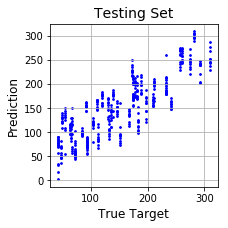

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import math
import statistics
import scipy
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from scipy import ndimage
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

n=440
n2=10
for j in range(n2):
    mean=0
    mean2=0
    mean3=0
    sum1=0.0
    sums1=0
    sum2=0
    sums2=0
    sum3=0
    sd1=0
    sd2=0
    for i in range(n):
        sum1=sum1+X[i,j]
    mean=sum1/n
    
    for i in range(n):
        sums1=sums1+((X[i,j]-mean)**2)
    sd1=math.sqrt(sums1/(n-1))
    
    for i in range(n):
        X[i,j]=(X[i,j]-mean)
        sum2=sum2+X[i,j]
    mean2=sum2/n
    
    for i in range(n):
        X[i,j]=(X[i,j])/sd1
        sum3=sum3+X[i,j]
        sums2=sums2+((X[i,j]-mean2)**2)
    mean3=sum3/n
    sd2=math.sqrt(sums2/(n-1))
    
def gaussian(x, u, sigma):
    return (np.exp(-0.5 * np.linalg.norm(x-u) / sigma))

Ny=np.zeros((44,10))
NX=np.zeros((44,10,10))
for j in range(10):
    a=0
    b=0
    for i in range(440):
        NX[a,j,b]=X[i,j]
        Ny[a,b]=y[i]
        a=a+1
        if a%44==0:
            b=b+1
            a=0
            
        
NNy=np.zeros((440))        
Ay=np.zeros((440))
for g in range(10):
    for k in range(10):
        N, p, z = NX.shape
        # Space for design matrix
        #
        M = 10
        U = np.zeros((N,M))
        # Basis function locations at random
        #
        kmeans = KMeans(n_clusters=M)
        kmeans.fit(NX[:,:,k])
        labels =kmeans.predict(NX[:,:,k])

        C = kmeans.cluster_centers_
        # Basis function range as distance between two random data
        #
        sigma= np.mean(scipy.spatial.distance.pdist(NX[:,:,k]))

        # Construct the design matrix
        #
        for i in range(N):
            for j in range(M):
                U[i,j] = gaussian(NX[i,:,k], C[j,:], sigma)
        # Pseudo inverse solution for linear part
        #
        l = np.linalg.inv(U.T @ U) @ U.T @ Ny[:,k]
        # Predicted values on training data
        #
        yh = U @ l
        #fig, ax = plt.subplots(figsize=(3,3))
        #ax.scatter(Ny[:,k], yh, c='m', s=3)
        #ax.grid(True)
        if k==9:
            #ax.set_title("Testing Set", fontsize=14)
            for i in range(44):
                Ay[i+(g*44)]=yh[i]
                NNy[i+(g*44)]=Ny[i,k]
        #else:
            #ax.set_title("Training Set", fontsize=14)
        #ax.set_xlabel("True Target", fontsize=12)
        #ax.set_ylabel("Prediction", fontsize=12)
     
    
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(NNy, Ay, c='b', s=3)
ax.grid(True)
ax.set_title("Testing Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)

Text(0,0.5,'Prediction')

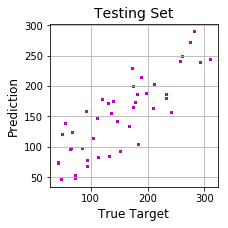

In [26]:
NNy2=np.zeros((440))        
Ay2=np.zeros((440))
for g in range(10):
    for k in range(10):
        kernel = 1.0 * RBF(1.0)
        gpc = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(NX[:,:,k], Ny[:,k])
        gpc.score(NX[:,:,k], Ny[:,k])
        if k==9:
            for i in range(44):
                Ay2[i+(g*44)]=yh[i]
                
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(NNy, Ay2, c='m', s=3)
ax.grid(True)
ax.set_title("Testing Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
440 10
(440,)
[   7.21676159 -236.24687902  519.99099852  336.19214992 -675.72894115
  394.32884974   -6.57325519  118.29397088  694.17537702   68.31589254]


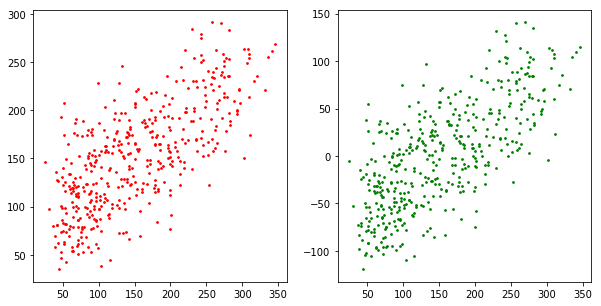

In [7]:
%matplotlib inline
import math
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
# Load data, inspect and do exploratory plots
#
diabetes = datasets.load_diabetes()
X = diabetes.data
t = diabetes.target
# Inspect sizes
#
NXX=np.zeros((440,10))
NXX=X[0:440,:]
nt=np.zeros((440))
nt=t[0:440]
print(X)
NumData, NumFeatures = NXX.shape
print(NumData, NumFeatures) # 442 X 10
print(nt.shape) # 442

# Linear regression using sklearn
#
lin = LinearRegression(fit_intercept=True)
lin.fit(NXX, nt)
th1 = lin.predict(NXX)
# Pseudo-incerse solution to linear regression
#
w = np.linalg.inv(NXX.T @ NXX) @ NXX.T @ nt
print(w)
th2 = NXX @ w
# Plot predictions to check if they look the same!
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(nt, th1, c='r', s=3)
ax[1].scatter(nt, th2, c='g', s=3)

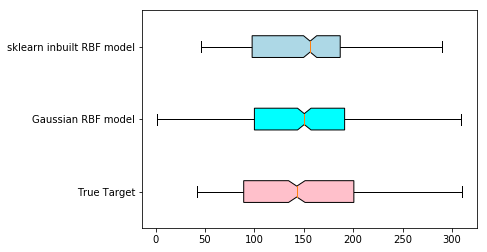

In [25]:
box_plot_data=[NNy,Ay,Ay2]
box=plt.boxplot(box_plot_data,notch='True',vert=0,patch_artist=True,labels=['True Target','Gaussian RBF model','sklearn inbuilt RBF model'])

colors = ['pink','cyan','lightblue', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()